In [1]:
import matplotlib
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
from matplotlib import colors as clrs
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def nonlinear(x):
    return 20*np.log10(x)

In [3]:
plt.style.use([hep.style.ROOT, hep.style.firamath])
hep.set_style("CMS")

<ipython-input-3-75f039bbb338>:2: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  hep.set_style("CMS")


In [4]:
plt.rcParams.update({'font.size': 15})

# Combined data for CPU plot

In [5]:
combined_cpu_data = {
    "hep" : {
        "labels" : [
            'MiniAOD',
            'DUNE',
            'HL-LHC Reco',
            'HL-LHC Trigger',
            'IceCube Data',
            'IceCube MMA',
        ],
        "x" : [720000000, 72000, 240000000, 2700000000, 10000000, 11],
        "y" : [1./3600., 1./72, 1./1200., 1./(4.*3600.), 1./25000., 1./25000.],
        "z" : [-2, -2, -2, 1, -2, 1],
        "w" : [400, 4000000, 4000, 5000, 100, 100]
    },
    'em': {
        "labels" : [
            'Variable Star\nClassification',
            'Param. Est. KNe',
            'Param. Est. SNe',
            'GP Regression',
            'Anomaly Detection',
            'Real-bogus',
        ],
        "x" : [3000, 100, 5e5, 5e5, 1e5, 1e6],
        "y" : [2/60/60, 35, 10000*0.01/60/60, 1/10/60/60, 15/60/60, 10/60/200e3],
        "z" : [-2, 0, -1, -1, -1, 1],
        "w" : [140, 10000, 100, 50, 50, 80]
    },
    "gw" : {
        "labels" : [
            'Match filt.',
            'Alert gen.',
            'Param. Est.\n(sampling)',
        ],
        "x" : [3600, 1, 1/(24),],
        "y" : [3000, 10, 100],
        "z" : [1, 0, -1,],
        "w" : [10e3, 1e3, 100e3]
    }
}

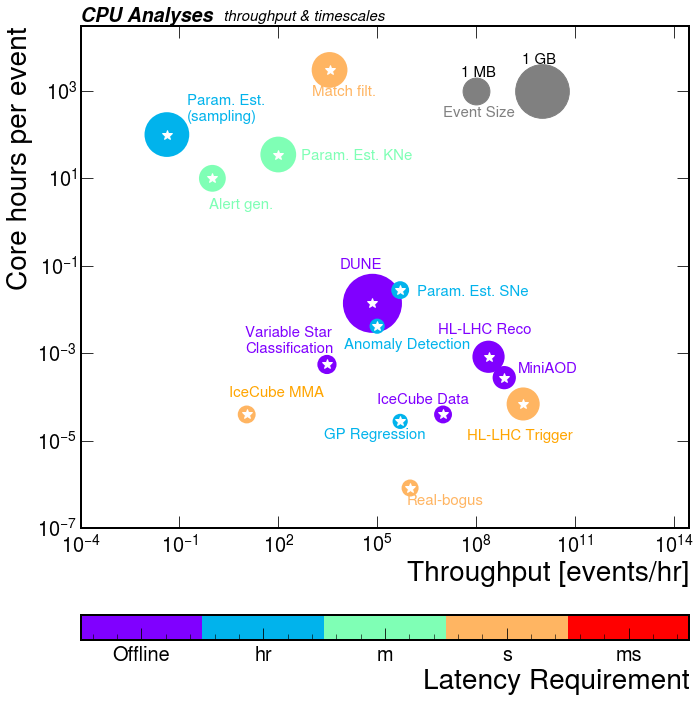

In [20]:
cmap = plt.cm.rainbow
norm = clrs.BoundaryNorm(np.arange(-2.5, 3, 1), cmap.N)

f, ax = plt.subplots()

for topic, data in combined_cpu_data.items():
    x = data["x"]
    y = data["y"]
    z = data["z"]
    w = data["w"]
    labels = data["labels"]

    for xi, yi, wi, l, zi in zip(x, y, w, labels, z):
        ax.scatter([xi], [yi], c=[zi], cmap=cmap, norm=norm, edgecolor='none', label=l,
                   s=0.2*nonlinear(wi)*nonlinear(wi))
        ax.plot([xi], [yi], label=l, marker='*', markersize=10, color='white')

        # text placements
        if 'Variable Star\n' in l:
            ax.text(1e1, 1e-3, l, color=cmap(norm(zi)))
        elif 'Classification' in l:
            ax.text(xi*3, yi*0.8, l, color=cmap(norm(zi)))
        elif 'Anomaly Detection' in l:
            ax.text(xi*0.1, yi*0.3, l, color=cmap(norm(zi)))
        elif 'Param. Est. KNe' in l:
            ax.text(xi*5, yi*0.75, l, color=cmap(norm(zi)))
            # ax.text(xi*0.01, yi*0.04, l, color=cmap(norm(zi)))
        elif 'Param. Est. SNe' in l:
            ax.text(xi*3.2, yi*0.75, l, color=cmap(norm(zi)))
        elif 'Real-Bogus' in l:
            ax.text(xi*1.4, yi*0.8, l, color=cmap(norm(zi)))
        elif 'DIA' in l:
            ax.text(xi*12, yi*1.1, l, color=cmap(norm(zi)))
        elif 'MiniAOD' in l:
            #ax.text(xi*0.0003, yi*0.45, l, color=cmap(norm(zi)))
            ax.text(xi*2.6, yi*1.3, l, color=cmap(norm(zi)))
        elif 'DUNE' in l:
            ax.text(xi*0.1, yi*6, l, color=cmap(norm(zi)))
        elif 'Reco' in l:
            ax.text(xi*0.03, yi*3.3, l, color=cmap(norm(zi)))
        elif 'Trigger' in l:
            ax.text(xi*0.02, yi*.15, l, color='orange')
        elif 'IceCube Data' in l:
            ax.text(xi*0.01, yi*1.75, l, color=cmap(norm(zi)))
        elif 'IceCube MMA' in l:
            ax.text(xi*0.3, yi*2.5, l, color='orange')
        elif 'IceCube Simulation' in l:
            ax.text(xi*0.03, yi*.15, l, color=cmap(norm(zi)))
        elif 'Match' in l:
            ax.text(xi*0.3, yi*0.25, l, color=cmap(norm(zi)))
        elif 'DeepClean' in l:
            ax.text(xi*0.8, yi*0.25, l, color=cmap(norm(zi)))
        elif 'sampling' in l:
            ax.text(xi*4, yi*2, l, color=cmap(norm(zi)))
        elif l == 'GP Regression':
            ax.text(xi*0.005, yi*0.4, l, color=cmap(norm(zi)))
        elif l == 'Alert gen.':
            ax.text(xi*0.8, yi*0.2, l, color=cmap(norm(zi)))
        else:
            ax.text(xi*0.8, yi*0.4, l, color=cmap(norm(zi)))



# ax.scatter([1e8], [20], label='1 MB', marker='o', s=1.*nonlinear(1000)*nonlinear(1000), color='gray')
# ax.scatter([1e10], [20], label='1 GB', marker='o', s=1.*nonlinear(1000000)*nonlinear(1000000), color='gray')
# ax.text(.4*1e8, 20, '1 MB', color='black',size=18)
# ax.text(.4*1e10, 20, '1 GB', color='black',size=18)
# ax.text(.3*1e8, 250, 'Event Size', color='grey',size=18)


hep.label.exp_text(text=" throughput & timescales",exp="CPU Analyses",italic=(True, True),loc=0,pad=0)

ymin = 1e-7
ymax = 3e4
xmin = 1e-4
xmax = 3e14

ax.scatter([1e8], [1e3], label='1 MB', marker='o', s=0.2*nonlinear(1000)*nonlinear(1000), color='gray')
ax.scatter([1e10], [1e3], label='1 GB', marker='o', s=0.2*nonlinear(1000000)*nonlinear(1000000), color='gray')
ax.text(.35*1e8, 2.1e3, '1 MB', color='black',size=15)
ax.text(.25*1e10, 4e3, '1 GB', color='black',size=15)
ax.text(.1*1e8, 250, 'Event Size', color='grey',size=15)


ax.loglog()
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel('Throughput [events/hr]', fontsize=28)
ax.set_ylabel('Core hours per event', fontsize=28)

ax.tick_params(axis='both', which='major', labelsize=20)

divider = make_axes_locatable(ax)
cax = divider.new_vertical(size='5%', pad=1.2, pack_start = True)
f.add_axes(cax)

PCM=ax.get_children()[0]
cbar = plt.colorbar(PCM, ax=ax, ticks=np.linspace(-2, 2, 5), label='Latency Requirement', cax = cax, orientation = 'horizontal')
cbar.set_label(label='Latency Requirement',size=28)#,weight='bold')
cbar.ax.set_xticklabels(['Offline','hr','m','s', 'ms'])
cbar.ax.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.savefig('combined-cpu-v1.pdf')

# Combined data for GPU plot

In [21]:
combined_gpu_data = {
    'em': {
        "labels" : [
            'Param. Est. SNe',
            'Classification',
            'Difference Imaging'
        ],
        "x" : [5e5, 5e5, 1000],
        "y" : [1/500/60/60, 1/60/5000, 0.03/60/60],
        "z" : [-1, -1, 0],
        "w" : [80, 10, 81250]
    },
    "gw" : {
        "labels" : [
            'DeepClean',
            'BBHNet',
            'DINGO',
            'DINGO-IS'
        ],
        "x" : [3600, 3600, 1/(24),1/(24)],
        "y" : [2, 10, 0.1, 1],
        "z" : [2, 2, 0, -1],
        "w" : [1e3, 1e3, 100e3, 100e3]
    },
    "hep" : {
        "labels" : [
            'DUNE',
            'HL-LHC Reco',
            'HL-LHC Trigger',
            'MiniAOD',
            'IceCube Sim'
        ],
        "x" : [72000, 240000000, 2700000000, 720000000, 2700*3600],
        "y" : [1./(3600./2.5), .075/3600., .1/(2.*4.*3600.), 1./360000., 3.7/(1000.*3600.)],
        "z" : [-2, -2, 1, -2, -2],
        "w" : [4000000, 4000, 5000, 400, 700]
    }
}

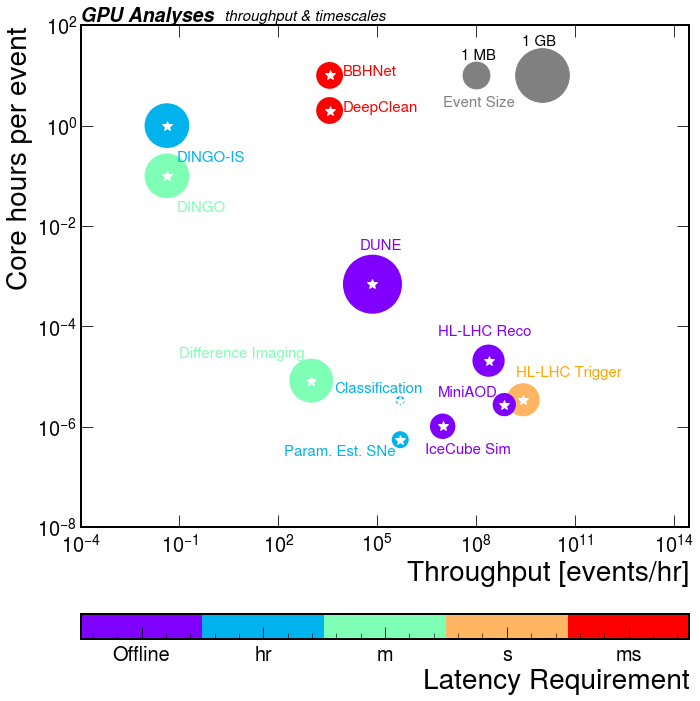

In [22]:
cmap = plt.cm.rainbow
norm = clrs.BoundaryNorm(np.arange(-2.5, 3, 1), cmap.N)

f, ax = plt.subplots()

for topic, data in combined_gpu_data.items():
    x = data["x"]
    y = data["y"]
    z = data["z"]
    w = data["w"]
    labels = data["labels"]

    for xi, yi, wi, l, zi in zip(x, y, w, labels, z):
        ax.scatter([xi], [yi], c=[zi], cmap=cmap, norm=norm, edgecolor='none', label=l,
                   s=0.2*nonlinear(wi)*nonlinear(wi))
        ax.plot([xi], [yi], label=l, marker='*', markersize=10, color='white')

        # text placements
        if 'Classification' in l:
            ax.text(xi*0.01, yi*1.5, l, color=cmap(norm(zi)))
        elif 'DINGO' in l:
            ax.text(xi*2, yi*0.2, l, color=cmap(norm(zi)))
        elif l=='BBHNet':
            ax.text(xi*2.5, yi*1.0, l, color=cmap(norm(zi)))
        elif 'Anomaly Detection' in l:
            ax.text(xi*3, yi*0.6, l, color=cmap(norm(zi)))
        elif 'Param. Est. KNe' in l:
            ax.text(xi*10, yi*0.75, l, color=cmap(norm(zi)))
            # ax.text(xi*0.01, yi*0.04, l, color=cmap(norm(zi)))
        elif 'Param. Est. SNe' in l:
            ax.text(xi*0.0003, yi*0.5, l, color=cmap(norm(zi)))
        elif 'Real-Bogus' in l:
            ax.text(xi*1.4, yi*0.8, l, color=cmap(norm(zi)))
        elif 'DIA' in l:
            ax.text(xi*12, yi*1.1, l, color=cmap(norm(zi)))
        elif 'MiniAOD' in l:
            ax.text(xi*0.01, yi*1.5, l, color=cmap(norm(zi)))
        elif 'DUNE' in l:
            ax.text(xi*0.4, yi*5, l, color=cmap(norm(zi)))
        elif 'Reco' in l:
            ax.text(xi*0.03, yi*3.3, l, color=cmap(norm(zi)))
        elif 'Trigger' in l:
            ax.text(xi*0.6, yi*3., l, color='orange')
        elif 'IceCube Sim' in l:
            ax.text(xi*0.3, yi*.3, l, color=cmap(norm(zi)))
        elif 'IceCube Data' in l:
            ax.text(xi*0.001, yi*.25, l, color=cmap(norm(zi)))
        elif 'IceCube MMA' in l:
            ax.text(xi*0.3, yi*2.5, l, color='orange')
        elif 'IceCube Simulation' in l:
            ax.text(xi*0.03, yi*.15, l, color=cmap(norm(zi)))
        elif 'Match' in l:
            ax.text(xi*0.3, yi*0.25, l, color=cmap(norm(zi)))
        elif 'DeepClean' in l:
            ax.text(xi*2.5, yi*1.0, l, color=cmap(norm(zi)))
        elif 'sampling' in l:
            ax.text(xi*2.5, yi*1.25, l, color=cmap(norm(zi)))
        elif l == 'Difference Imaging':
            ax.text(xi*0.0001, yi*3.0, l, color=cmap(norm(zi)))

        else:
            ax.text(xi*0.8, yi*0.4, l, color=cmap(norm(zi)))



# ax.scatter([1e8], [20], label='1 MB', marker='o', s=1.*nonlinear(1000)*nonlinear(1000), color='gray')
# ax.scatter([1e10], [20], label='1 GB', marker='o', s=1.*nonlinear(1000000)*nonlinear(1000000), color='gray')
# ax.text(.4*1e8, 20, '1 MB', color='black',size=18)
# ax.text(.4*1e10, 20, '1 GB', color='black',size=18)
# ax.text(.3*1e8, 250, 'Event Size', color='grey',size=18)


hep.label.exp_text(text=" throughput & timescales",exp="GPU Analyses",italic=(True, True),loc=0,pad=0)

ymin = 1e-8
ymax = 1e2
xmin = 1e-4
xmax = 3e14

ax.loglog()
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel('Throughput [events/hr]', fontsize=28)
ax.set_ylabel('Core hours per event', fontsize=28)

ax.tick_params(axis='both', which='major', labelsize=20)

ax.scatter([1e8], [1e1], label='1 MB', marker='o', s=0.2*nonlinear(1000)*nonlinear(1000), color='gray')
ax.scatter([1e10], [1e1], label='1 GB', marker='o', s=0.2*nonlinear(1000000)*nonlinear(1000000), color='gray')
ax.text(.35*1e8, 2.1e1, '1 MB', color='black',size=15)
ax.text(.25*1e10, 4e1, '1 GB', color='black',size=15)
ax.text(.1*1e8, 2.5, 'Event Size', color='grey',size=15)

divider = make_axes_locatable(ax)
cax = divider.new_vertical(size='5%', pad=1.2, pack_start = True)
f.add_axes(cax)

PCM=ax.get_children()[0]
cbar = plt.colorbar(PCM, ax=ax, ticks=np.linspace(-2, 2, 5), label='Latency Requirement', cax = cax, orientation = 'horizontal')
cbar.set_label(label='Latency Requirement',size=28)#,weight='bold')
cbar.ax.set_xticklabels(['Offline','hr','m','s', 'ms'])
cbar.ax.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.savefig('combined-gpu-v3.pdf')